In [1]:
from everything import *
from scipy.stats import spearmanr

sys.path.append('..')
from gensim.models import Word2Vec

In [2]:
cbow_filename = join(expanduser('~'), 'wembedder_data', 'models', 
                     'wikidata-20170613-truthy-BETA-cbow-size=100-window=1-min_count=20',
                     'wikidata-20170613-truthy-BETA-cbow-size=100-window=1-min_count=20')
skipgram_filename = join(expanduser('~'), 'wembedder_data', 'models', 
                     'wikidata-20170613-truthy-BETA-skipgram-size=100-window=1-min_count=20',
                     'wikidata-20170613-truthy-BETA-skipgram-size=100-window=1-min_count=20')

In [3]:
wordsim = read_csv('../wembedder/data/wordsim353_wikidata.csv', index_col=0)

In [4]:
wordsim.head()

,word1,word2,human,q1,q2,label1,label2
0,love,sex,6.77,Q316,Q5873,love,sexual intercourse
1,tiger,cat,7.35,Q19939,Q146,tiger,cat
2,tiger,tiger,10.00,Q19939,Q19939,tiger,tiger
3,book,paper,7.46,Q571,Q11472,book,paper
4,computer,keyboard,7.62,Q68,Q1921606,computer,keyboard


In [5]:
cbow_model = Word2Vec.load(cbow_filename)
skipgram_model = Word2Vec.load(skipgram_filename)

In [6]:
# Number of words in vocabulary
len([q for q in set(wordsim.q1).union(wordsim.q2) if q in cbow_model])

278

In [7]:
# Example similarity
cbow_model.similarity('Q19939', 'Q146')

0.82798253952951129

In [8]:
cbow_similarities = []
skipgram_similarities = []
for n, (word1, word2, human, q1, q2, *rest) in wordsim.iterrows():
    try:
        similarity = cbow_model.similarity(q1, q2)
    except:
        similarity = nan
    cbow_similarities.append(similarity)
    try:
        similarity = skipgram_model.similarity(q1, q2)
    except:
        similarity = nan
    skipgram_similarities.append(similarity)    

In [9]:
wordsim['cbow_similarity'] = cbow_similarities
wordsim['skipgram_similarity'] = skipgram_similarities

In [10]:
wordsim.head()

,word1,word2,human,q1,q2,label1,label2,cbow_similarity,skipgram_similarity
0,love,sex,6.77,Q316,Q5873,love,sexual intercourse,0.904173,0.899009
1,tiger,cat,7.35,Q19939,Q146,tiger,cat,0.827983,0.855750
2,tiger,tiger,10.00,Q19939,Q19939,tiger,tiger,1.000000,1.000000
3,book,paper,7.46,Q571,Q11472,book,paper,0.544965,0.544285
4,computer,keyboard,7.62,Q68,Q1921606,computer,keyboard,0.709703,0.771008


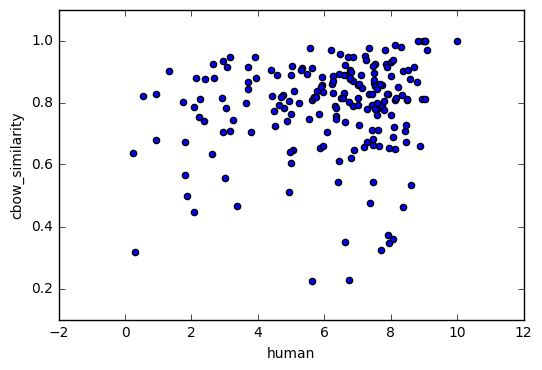

In [11]:
wordsim.plot('human', 'cbow_similarity', kind='scatter')
show()

In [12]:
X = wordsim.dropna(how='any')[['human', 'cbow_similarity', 'skipgram_similarity']]

In [13]:
corrcoef(X.T)

array([[ 1.        ,  0.13435105,  0.10818974],
       [ 0.13435105,  1.        ,  0.94592419],
       [ 0.10818974,  0.94592419,  1.        ]])

In [14]:
spearmanr(X.human, X.cbow_similarity)

SpearmanrResult(correlation=0.13462514197041839, pvalue=0.062642053818111526)

In [15]:
spearmanr(X.human, X.skipgram_similarity)

SpearmanrResult(correlation=0.098629686412093409, pvalue=0.1734979955882856)